### Importação de Módulos e Arquivos

In [1]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';', decimal = ',')
servico_df = pd.read_excel('BaseServiçosPrestados.xlsx')
    #Retirar colunos 
    
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'],axis=1)
servico_df = servico_df.drop(['Unnamed: 4','Unnamed: 5'],axis=1)
    
    
display(funcionarios_df)
display(clientes_df)
display(servico_df)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1 - Folha Salarial

In [2]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base']+ funcionarios_df['Impostos']+ funcionarios_df['Beneficios']+ funcionarios_df['VT'] + funcionarios_df['VR']
print('A Folha Salarial Mensal é de R$ {:,}'.format(funcionarios_df['Salario Total'].sum()))

A Folha Salarial Mensal é de R$ 2,717,493.22


### 2 - Faturamento da Empresa

In [3]:
faturamentos_df =  servico_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['Valor Contrato Mensal','ID Cliente']], on='ID Cliente')

faturamentos_df['Faturamento Toral'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']

print(' O Faturamento da Empresa foi de R$ {:,}'.format(faturamentos_df['Faturamento Toral'].sum()))

#display(faturamentos_df)

 O Faturamento da Empresa foi de R$ 5,519,160


### 3 - Porcentagem de Funcionários Fecharam Contrato

In [5]:
qtde_fun_fc= len(servico_df['ID Funcionário'].unique())
qtde_fun_total = len(funcionarios_df['ID Funcionário'])

print('{:.2%} dos funcionários fecharam contrato'.format(qtde_fun_fc/qtde_fun_total))


86.84% dos funcionários fecharam contrato


### 4- Contrato por àrea

In [18]:
contrato_area_df = servico_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')

contrato_area_qtde = contrato_area_df['Area'].value_counts()


print(contrato_area_qtde)


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


### 5 -  Funcionários por área

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


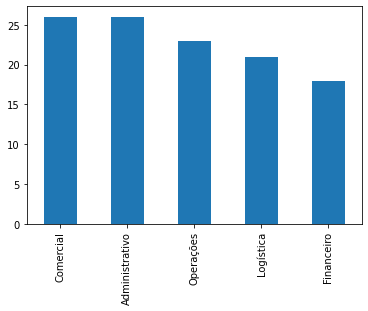

In [25]:
funcionario_area = funcionarios_df['Area'].value_counts()
print(funcionario_area)
funcionario_area.plot(kind ='bar');

### 6 - Ticket médio mensal

In [32]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('A média mensal dos Tickets são de R$ {:,.2f}'.format(ticket_medio))

A média mensal dos Tickets são de R$ 2,502.56
